In [1]:
import pandas as pd
df = pd.read_csv("/Zudio_sales_data.csv")
df.head()

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,Zudio,India,Karnataka,Jalna,Women,Dresses,30,411084,Owned,2022-06-04,...,Alarm,88240,2024-11-06,November,233084,Michele Ochoa,354,1958,5,3916.0
1,Zudio,India,Gujarat,Patna,Kids,Skirts,48,404562,Owned,2020-12-19,...,Alarm,78145,2024-06-17,June,926472,Daniel Jimenez,741,2078,1,831.2
2,Zudio,India,Uttar Pradesh,Kolkata,Men,Hoodies,97,437773,Rented,2023-09-04,...,CCTV,33363,2024-08-17,August,853255,Steven Davis,607,1445,2,1156.0
3,Zudio,India,West Bengal,Kolkata,Women,Dresses,93,431725,Owned,2024-04-11,...,CCTV,46682,2024-03-27,March,106146,Derek Orozco,991,2469,6,5925.6
4,Zudio,India,West Bengal,Guwahati,Men,Dresses,51,415370,Owned,2022-05-29,...,"CCTV, Alarm",58242,2024-04-08,April,264070,Victor Arnold,479,1105,6,2652.0


In [2]:
df.shape

(7899, 28)

In [3]:
df.isna()

,Store,Country,State,City,Category,Clothing Type,Store Number,Postal Code,Store Type,Store Open Date,...,Security Features,Order ID,Order Date,Month,Customer ID,Customer Name,Product ID,Price,Quantity,Sales Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# Info about data-types and null values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7899 entries, 0 to 7898
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      7899 non-null   object 
 1   Country                    7899 non-null   object 
 2   State                      7899 non-null   object 
 3   City                       7899 non-null   object 
 4   Category                   7899 non-null   object 
 5   Clothing Type              7899 non-null   object 
 6   Store Number               7899 non-null   int64  
 7   Postal Code                7899 non-null   int64  
 8   Store Type                 7899 non-null   object 
 9   Store Open Date            7899 non-null   object 
 10  Selling Area Size (sq ft)  7899 non-null   int64  
 11  Store Manager              7899 non-null   object 
 12  Manager ID                 7899 non-null   object 
 13  Store Address              7899 non-null   objec

In [5]:
# Convert date column to datetime format
df['Store Open Date'] = pd.to_datetime(df['Store Open Date'], errors='coerce')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing categorical values with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# Fill missing numerical values with 0
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(0)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

/tmp/ipython-input-1230089175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


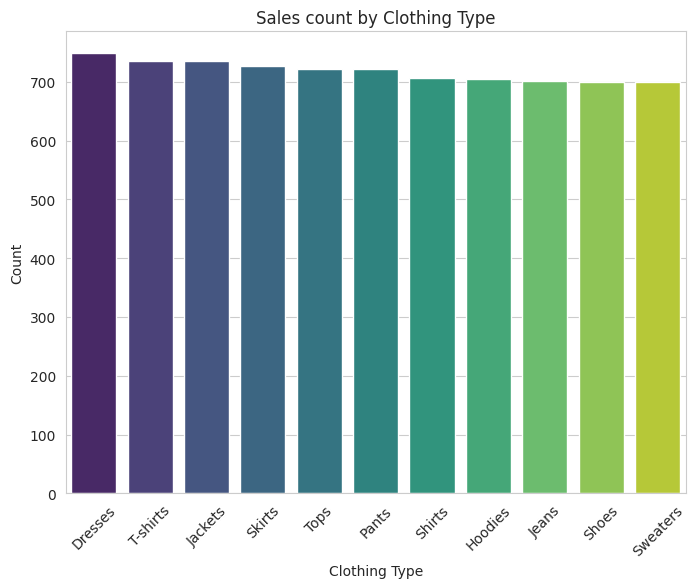

In [7]:
# Clothing type distribution
plt.figure(figsize=(8,6))
sns.countplot(
    x="Clothing Type",
    data = df,
    palette = "viridis",
    order = df["Clothing Type"].value_counts().index
    )
plt.title("Sales count by Clothing Type")
plt.xticks(rotation=45)
plt.xlabel("Clothing Type")
plt.ylabel("Count")
plt.show()

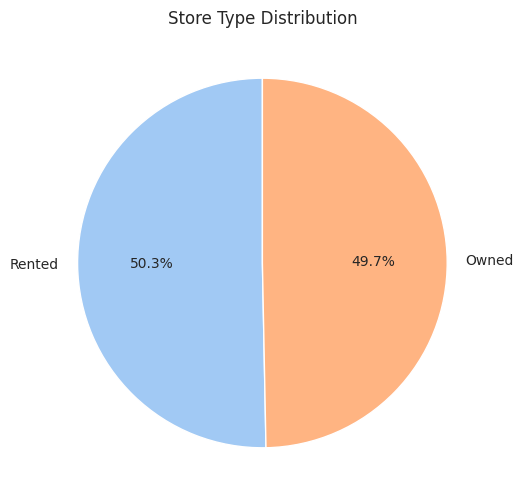

In [8]:
# Store Type Distribution
plt.figure(figsize = (6,6))
df['Store Type'].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%', colors = sns.color_palette("pastel"))
plt.title('Store Type Distribution')
plt.ylabel("")
plt.show()

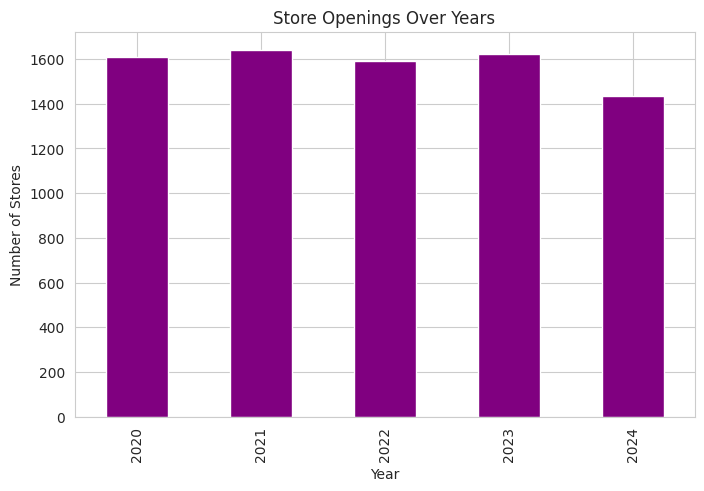

In [9]:
# Store Openings Over Years

# Extract the year component
df['Year'] = df['Store Open Date'].dt.year
# Group by 'Year' and calculate size for each group
df.groupby('Year').size().plot(kind = 'bar', color = 'purple', figsize=(8,5))

plt.title("Store Openings Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Stores")
plt.show()

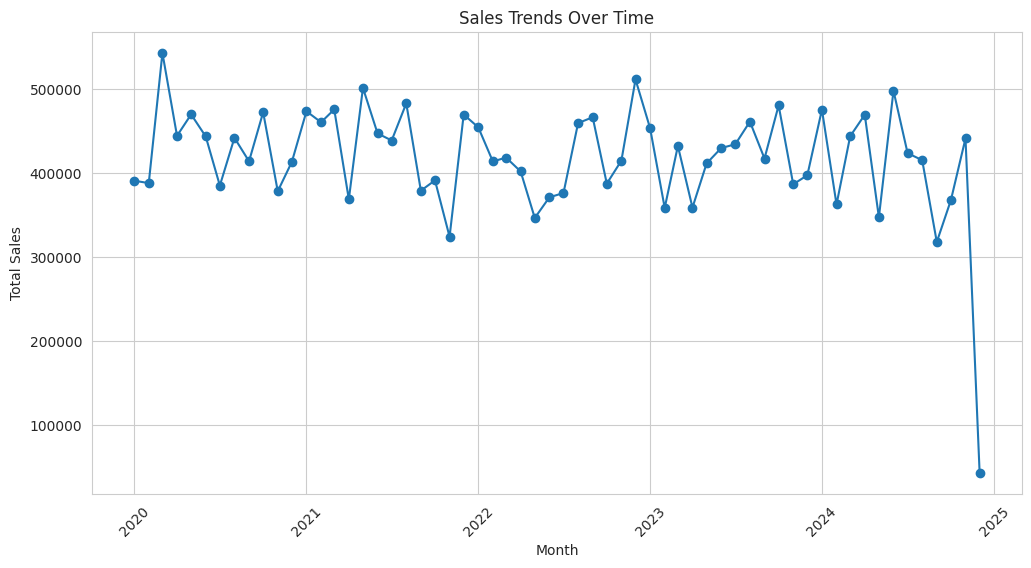

In [10]:
# Sales trends over time

# Ensure date column is in date-time format
df['Store Open Date'] = pd.to_datetime(df['Store Open Date'], errors='coerce')

# Group sales by month
sales_over_time = df.groupby(df['Store Open Date'].dt.to_period('M'))['Sales Profit'].sum().reset_index()

# Convert 'Store Open Date' back to datetime for plotting
sales_over_time['Store Open Date'] = pd.to_datetime(sales_over_time['Store Open Date'].dt.to_timestamp())

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Store Open Date'], sales_over_time['Sales Profit'], marker='o', linestyle='-')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
df.to_csv("Zudio_Sales_analysis.csv", index=False)


In [12]:
from google.colab import files
files.download("Zudio_Sales_analysis.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>